In [1]:
from keras.datasets import boston_housing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

In [4]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [5]:
print(train_data)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [7]:
print(test_data)

[[ 1.55369355 -0.48361547  1.0283258  ...  0.78447637 -3.48459553
   2.25092074]
 [-0.39242675 -0.48361547 -0.16087773 ... -0.30759583  0.42733126
   0.47880119]
 [-0.39982927 -0.48361547 -0.86940196 ...  0.78447637  0.44807713
  -0.41415936]
 ...
 [-0.20709507 -0.48361547  1.24588095 ... -1.71818909  0.37051949
  -1.49344089]
 [-0.36698601 -0.48361547 -0.72093526 ... -0.48960787  0.39275481
  -0.41829982]
 [-0.0889679  -0.48361547  1.24588095 ... -1.71818909 -1.21946544
  -0.40449827]]


In [8]:
from sklearn.svm import SVR


In [55]:
regressor = SVR(kernel = 'rbf')
regressor.fit(train_data,train_targets).score(train_data,train_targets)



0.6552385069275066

In [56]:
A=regressor.predict(test_data)
regressor.score(test_data,test_targets)

0.6727494960000222

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
print(mean_absolute_error(test_targets,A))

3.3853985445850494


In [59]:
test_targets.shape

(102,)

In [19]:
A.shape

(102,)

In [34]:
predicted.max()

22.814656998377128

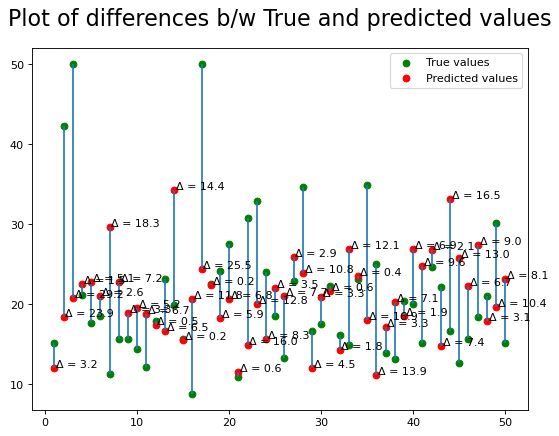

In [53]:
from matplotlib.pyplot import figure

figure(figsize=(8,6), dpi=80)
true_vals = np.array(train_targets[:50])
predicted = np.array(A[:50])
X = range(1, len(predicted)+1)

#dy = (np.random.rand(20)-0.5)*0.5


plt.scatter(X, true_vals, color='green', label='True values')
plt.scatter(X, predicted, color='red', label='Predicted values')

plt.vlines(X,true_vals,predicted)#,predicted+dy)


differences = abs(true_vals-predicted)
differences = [round(i, 1) for i in differences]


#for i, label in enumerate(differences):
    #plt.annotate('Δ = {}'.format(label), (X[i]+0.20, predicted[i]+0.05))
plt.title('Plot of differences b/w True and predicted values', fontsize=20, pad=20)
plt.legend()

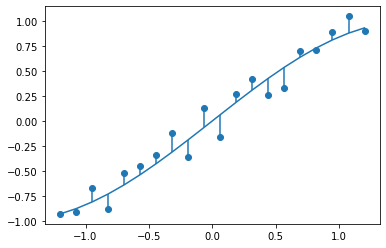

In [31]:
x = np.linspace(-1.2,1.2,20)
y = np.sin(x)
dy = (np.random.rand(20)-0.5)*0.5

fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x,y+dy)

ax.vlines(x,y,y+dy)

plt.show()